#Real Estate Listing Price Prediction
###Members: Singaram Subramanyan and Manmohanbabu Rupanagudi

###Dataset:
 https://www.kaggle.com/datasets/febinphilips/us-house-listings-2023/data

In [ ]:
%matplotlib inline
%pip --quiet install opendatasets
%pip --quiet install vaex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 41.2 MB/s eta 0:00:00

In [ ]:
import opendatasets as od
import vaex
import warnings; warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from scipy.stats import randint

In [ ]:
od.download("https://www.kaggle.com/datasets/febinphilips/us-house-listings-2023/data?select=cleaned_df.csv")

us_house_listings = pd.read_csv("/content/us-house-listings-2023/cleaned_df.csv")

# us_house_listings.Zipcode = us_house_listings.Zipcode.astype('int64')
us_house_listings.Zipcode = us_house_listings.Zipcode.astype('string')
us_house_listings

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pandu0
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/febinphilips/us-house-listings-2023


100%|██████████| 3.05M/3.05M [00:00<00:00, 79.1MB/s]

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
0,AL,Saraland,Scott Dr,36571.0,4.0,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,30.819534,-88.095960,239900.0
1,AL,Robertsdale,Cowpen Creek Rd,36567.0,3.0,2.0,1800.0,144.388889,3.2000,NaN,NaN,30.590004,-87.580376,259900.0
2,AL,Gulf Shores,Spinnaker Dr #201,36542.0,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0
3,AL,Chelsea,Mallet Way,35043.0,3.0,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,33.357986,-86.608700,335000.0
4,AL,Huntsville,Turtlebrook Ct,35811.0,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22676,WY,Burns,Road 210a,82053.0,2.0,1.0,1112.0,337.230216,20.0000,368600.0,1500.0,41.149517,-104.439620,375000.0
22677,WY,Cody,Lincoln Ave,82414.0,2.0,3.0,1232.0,241.801948,0.0300,NaN,NaN,44.524570,-109.033844,297900.0
22678,WY,Dubois,Mason Dr,82513.0,2.0,2.0,2016.0,262.896825,1.4200,NaN,2294.0,43.521640,-109.594050,530000.0
22679,WY,Cheyenne,Carolina Rd,82009.0,3.0,2.0,2930.0,196.552901,6.2300,558000.0,2749.0,41.138450,-105.052790,575900.0


##Questions for Exploratory Data Analysis

**1.** Find out if there's a correlation between the `State` and the `Area(sqft)`.  
**Why we care**: We care because this will us insight into whether certain states have larger houses compared to others.

**2.** Find out the average ratio between the House `Area(sqft)` and the `LotArea(acres)`.  
**Why we care**: We care because it will help us understand what percent of the lot is used when building houses.




**3.** Find out if houses with a larger ratio between `Area(sqft)` and `LotArea(acres)` are priced lower.  
**Why we care**: This will reveal pattern in the consumers preferences.



**4.** What is the relationship between the number of `Bedrooms` and the `PPSq(Price Per Sqauare Foot)`.  
**Why we care**: This will also reveal the consumers preferences when it comes to the number of bedrooms.


**5.** What is the relationship between the number of `Bathrooms` and the `PPSq(Price Per Sqauare Foot)`.  
**Why we care**: This will also reveal the consumers preferences when it comes to the number of bathrooms.

**6.** Is there a relationship between the `Market Estimate` and the `State` the real estate is located in?

**Why we care:** We care about this information, in the real world there is a significant coreleation between the price and the geographic location



**7.** Create graph the `latiude` and `longitude` of the house listings to discover where the listings are concentrated.

**Why we care:** We care about this because the graph will reveal the most popular housing markets and where most of the listings are concentrated.

**8.** What are the top 5 cities with the most expensive `PPSq(Price Per Sqauare Foot)` ratio?

**Why we care:** We care about this because this will give us insight into what cities are the most expensive and give us insight into the data.

**9.** What is the average difference between the `Market Estimate` of the house and the `Listed Price`?

**Why we care:** We care about this because this will give us insight into the current demand in the housing market.

**10.** What are the top 5 `Zipcode` with the highest average `Listed Price`?

**Why we care:** We care about this informatin because this will give us insight into where the most expensive houses are located.

## Exploratory Data Analysis

**1.** Find out if there's a correlation between the `State` and the `Area`(sqft).  

<Figure size 2000x2000 with 0 Axes>

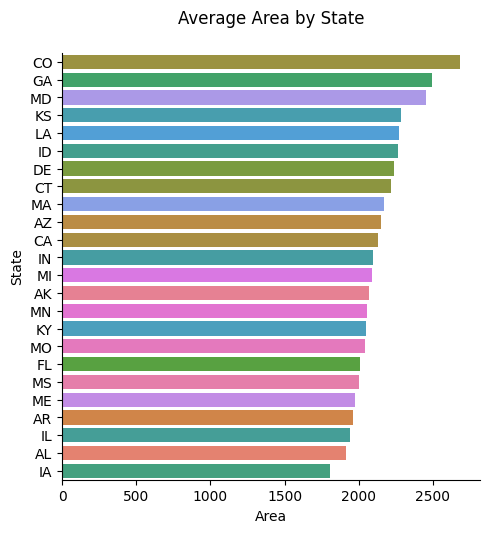

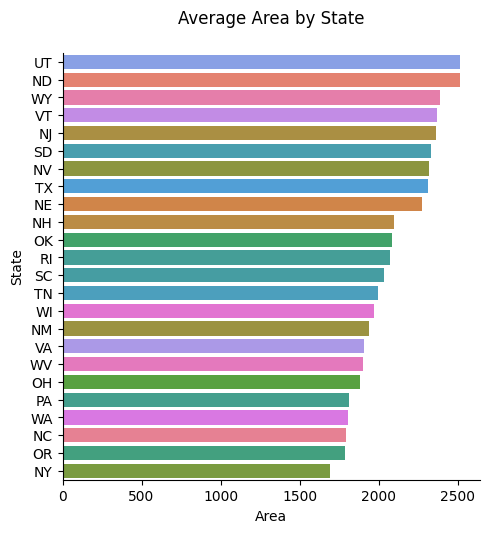

In [ ]:
avg_area_per_state = us_house_listings.groupby(by='State')['Area'].mean()

avg_area_per_state = avg_area_per_state.to_frame()

plt.figure(figsize=(20,20))

sns.catplot(
    data=avg_area_per_state.iloc[0:24, :],
    x='Area',
    y=avg_area_per_state.iloc[0:24, :].index,
    kind='bar',
    hue=avg_area_per_state.iloc[0:24, :].index,
    order=avg_area_per_state.iloc[0:24, :].sort_values(by='Area',ascending=False).index,
)

plt.title("Average Area by State", y=1.05);

sns.catplot(
    data=avg_area_per_state.iloc[25:, :],
    x='Area',
    y=avg_area_per_state.iloc[25:, :].index,
    kind='bar',
    hue=avg_area_per_state.iloc[25:, :].index,
    order=avg_area_per_state.iloc[25:, :].sort_values(by='Area',ascending=False).index,
)

plt.title("Average Area by State", y=1.05);


Answer: We can observe that larger states such as Colorado (CO), Utah (UT) typically offer more Area (sqft) in houses compared to smaller states like New York (NY).

**2.** Find out the average ratio between the House `Area`(sqft) and the `LotArea`(acres).

In [ ]:
us_house_listings[(us_house_listings.Area != 0) & (us_house_listings.LotArea != 0)].apply(
      lambda x: x.Area/(x.LotArea * 43560), axis=1
    ).dropna().mean()

1099.520149490539

**3.** Find out if houses with a larger ratio between `Area(sqft)` and `LotArea(acres)` are priced lower.

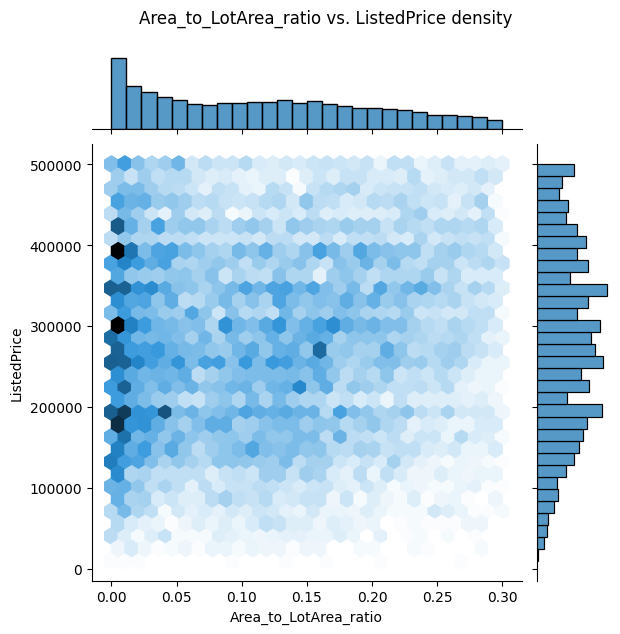

In [ ]:

def find_ratio(x):
  if (x.LotArea == 0 or x.Area == 0):
    return 0
  else:
    return x.Area/(x.LotArea * 43560)

temp_us_house_listings = us_house_listings.copy()

temp_us_house_listings['Area_to_LotArea_ratio'] = us_house_listings.apply(find_ratio, axis=1)

sns.jointplot(
    data=temp_us_house_listings[temp_us_house_listings.Area_to_LotArea_ratio < 0.3],
    x='Area_to_LotArea_ratio',
    y=temp_us_house_listings[(temp_us_house_listings.Area_to_LotArea_ratio < 0.3) & (temp_us_house_listings.ListedPrice < 500000)].ListedPrice,
    # hue='ListedPrice',
    # palette="viridis",
    kind="hex"
)

plt.suptitle("Area_to_LotArea_ratio vs. ListedPrice density", y=1.05);

# us_house_listings.ListedPrice.describe()


Answer: A good chuck of houses have a Area_to_LotArea_ratio less than `0.10` which are priced between `400k` and `200k`

**4.** What is the relationship between the number of `Bedrooms` and the `PPSq(Price Per Sqauare Foot)`?

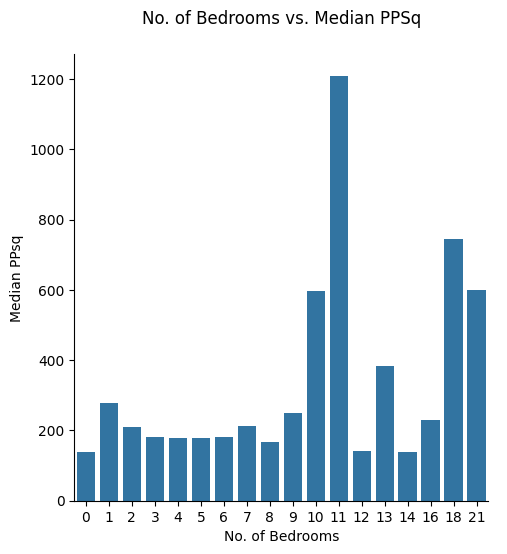

In [ ]:
bedroom_ppsq_df = us_house_listings.groupby(by='Bedroom')['PPSq'].median().to_frame()

sns.catplot(
    data=bedroom_ppsq_df,
    x=[int(x) for x in bedroom_ppsq_df.index.values],
    y=bedroom_ppsq_df.PPSq,
    # hue='PPSq',
    kind='bar',
)

plt.ylabel("Median PPsq")
plt.xlabel("No. of Bedrooms")
plt.title("No. of Bedrooms vs. Median PPSq", y=1.05);

Asnwer: The distribuition here is abnormal. There is a peak at 11 Bedrooms which is mostlikey due to insufficent data or large amount of outliers.

**5.** What is the relationship between the number of `Bathrooms` and the `PPSq(Price Per Sqauare Foot)`.

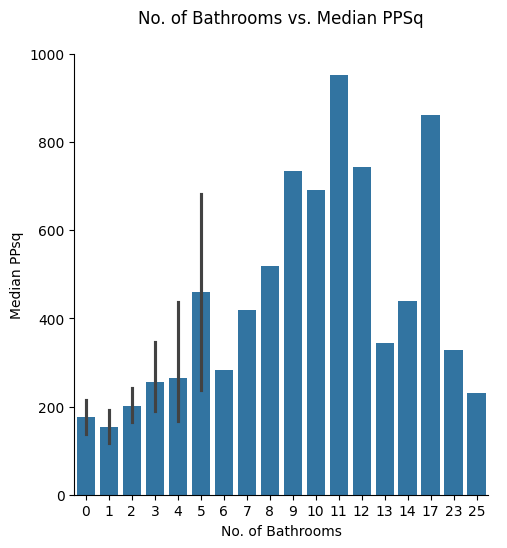

In [ ]:
bathroom_ppsq_df = us_house_listings.groupby(by='Bathroom')['PPSq'].median().to_frame()

sns.catplot(
    data=bathroom_ppsq_df,
    x=[ int(x) for x in bathroom_ppsq_df.index.values],
    y=bathroom_ppsq_df.PPSq,
    kind='bar',
)

plt.ylabel("Median PPsq")
plt.xlabel("No. of Bathrooms")
plt.title("No. of Bathrooms vs. Median PPSq", y=1.05);

Answer: The distribution seems to be somewhat normal. Most noticably, the more bathrooms the higher median `PPSq`.

**6.** Is there a relationship between the `Market Estimate` and the `State` the real estate is located in?

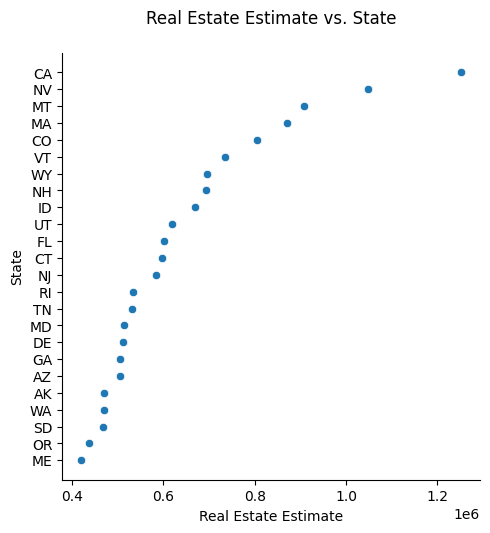

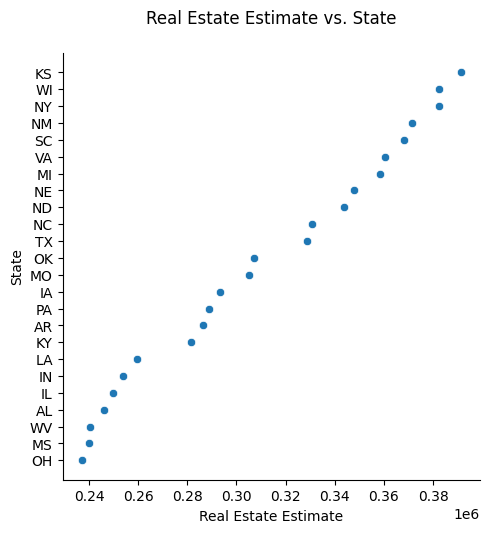

In [ ]:
sns.relplot(
    data=us_house_listings.groupby(by='State')['MarketEstimate'].mean().to_frame().reset_index().sort_values(by=['MarketEstimate'],ascending=False).iloc[0:24, :],
    x='MarketEstimate',
    y='State',
    kind='scatter'

)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.xlabel("Real Estate Estimate")
plt.title("Real Estate Estimate vs. State", y=1.05);
sns.relplot(
    data=us_house_listings.groupby(by='State')['MarketEstimate'].mean().to_frame().reset_index().sort_values(by=['MarketEstimate'],ascending=False).iloc[25:, :],
    x='MarketEstimate',
    y='State',
    kind='scatter'

)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.xlabel("Real Estate Estimate")
plt.title("Real Estate Estimate vs. State", y=1.05);


Answer: There is a relationship between the state and the average Real Estate Estimate as the average varies widely based on state. For example, California has an average Real Estate Estimate of about 1,200,000, while Ohio has an average Real Estate Estimate of 240,000

**7.** Create graph the `latiude` and `longitude` of the house listings to discover where the listings are concentrated.

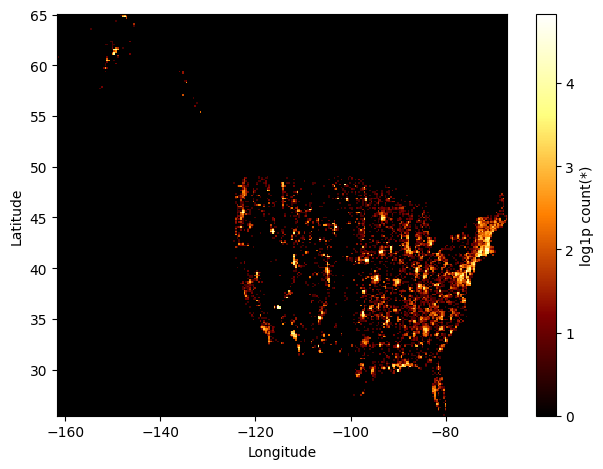

In [ ]:
us_house_listings_vaex = vaex.from_pandas(us_house_listings, copy_index=False)
us_house_listings_vaex.export_hdf5('us_house_listings_vaex.hdf5')
us_house_listings_vaex_1 = vaex.open('us_house_listings_vaex.hdf5')
us_house_listings_vaex_1.viz.heatmap(us_house_listings_vaex_1.Longitude, us_house_listings_vaex_1.Latitude, f="log1p", show=True);

Answer: The graph shows the concentration of house listings across the United States. As per the graph, the right side of the United States had more listings than the left.

**8.** What are the top 5 cities with the most expensive `PPSq(Price Per Sqauare Foot)` ratio?

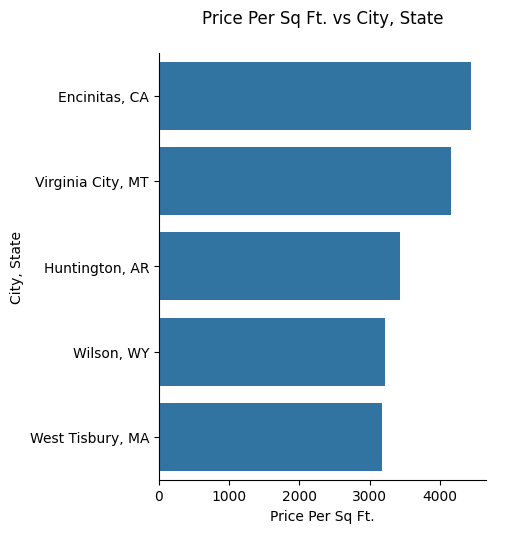

In [ ]:
temp_us_house_listings = us_house_listings.copy()
temp_us_house_listings['City, State'] = us_house_listings.City + ', ' + us_house_listings.State
most_expensive_cities = temp_us_house_listings.groupby(by='City, State')['PPSq'].mean().to_frame().reset_index().sort_values(by=['PPSq'],ascending=False).iloc[0:5, :]

sns.catplot(
    data=most_expensive_cities,
    x='PPSq',
    y='City, State',
    kind='bar'
)

plt.xlabel("Price Per Sq Ft.")
plt.title("Price Per Sq Ft. vs City, State", y=1.05);


Answer: The graph shows the five most expensive cities based on the price per sq ft. As per the graph, Encinitas, CA is the most expensive city.

**9.** What is the average difference between the `Market Estimate` of the house and the `Listed Price`?

In [ ]:
market_listing_dif = us_house_listings.MarketEstimate - us_house_listings.ListedPrice
market_listing_dif.mean()

-11565.611460019423

Answer: The average difference between the market estimate and the listing price of the house is -11565.611460019423. This suggests that on average houses were listed $11565.61 over the market estimate.



**10.** What are the top 5 `Zipcode` with the highest average `Listed Price`?


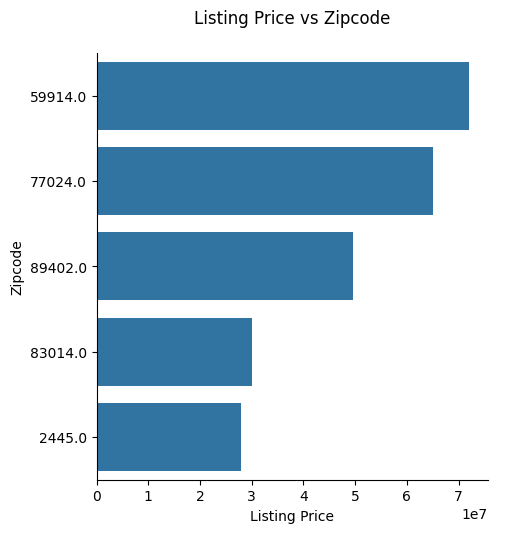

In [ ]:
most_expensive_cities = us_house_listings.groupby(by='Zipcode')['ListedPrice'].mean().to_frame().reset_index().sort_values(by=['ListedPrice'],ascending=False).iloc[0:5, :]

sns.catplot(
    data=most_expensive_cities,
    x='ListedPrice',
    y='Zipcode',
    kind='bar'
)
plt.xlabel("Listing Price")
plt.title("Listing Price vs Zipcode", y=1.05);


Answer: The graph shows the zipcodes with the highest average listing prices in the United States. The zipcode with the highest average listing price is 59914.

**11.**What's the corelation between `PPSq(Price Per Sqauare Foot)` and `ListedPrice`?

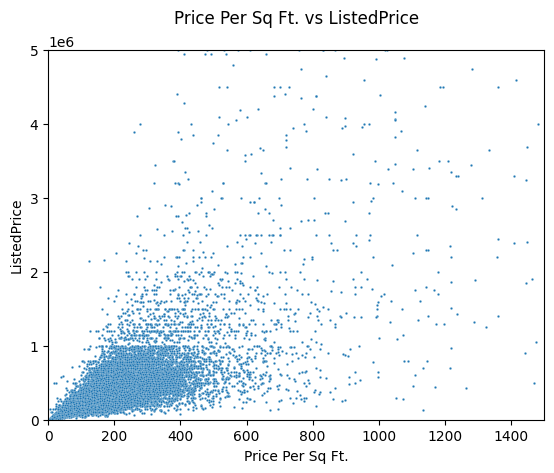

In [ ]:
temp_us_house_listings = us_house_listings.copy()

sns.scatterplot(
    data=temp_us_house_listings,
    x='PPSq',
    y='ListedPrice',
    s=3
)

plt.xlabel("Price Per Sq Ft.")
plt.xlim((0, 1500))
plt.ylim((0, 0.5*(10**7)))
plt.title("Price Per Sq Ft. vs ListedPrice", y=1.05);

Answer: `ListedPrice` and `PPSq(Price Per Sqauare Foot)` have somewhat of a linear correlation, especially for lower list prices and Price Per Sq Ft.

Correlation Matrix of the numerical columns in the Dataset

In [ ]:
df_dropped = us_house_listings.drop(columns=['State', 'City', 'Street', 'Zipcode'])
df_dropped.corr().style.background_gradient(cmap="bwr", vmin=-1, vmax=1)

,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
Bedroom,1.000000,0.625465,0.554455,0.037412,0.056718,0.227894,0.264860,-0.025923,-0.008439,0.254355
Bathroom,0.625465,1.000000,0.735535,0.224021,0.092539,0.473653,0.490880,-0.055763,-0.025488,0.468714
Area,0.554455,0.735535,1.000000,0.183253,0.180868,0.532880,0.492351,0.007575,-0.024973,0.582257
PPSq,0.037412,0.224021,0.183253,1.000000,0.241498,0.665292,0.556763,0.053781,-0.103229,0.667013
LotArea,0.056718,0.092539,0.180868,0.241498,1.000000,0.120555,0.132772,0.046951,0.012055,0.273143
MarketEstimate,0.227894,0.473653,0.532880,0.665292,0.120555,1.000000,0.920190,0.018280,-0.053777,0.994472
RentEstimate,0.264860,0.490880,0.492351,0.556763,0.132772,0.920190,1.000000,0.012978,-0.019587,0.774310
Latitude,-0.025923,-0.055763,0.007575,0.053781,0.046951,0.018280,0.012978,1.000000,-0.317057,0.018523
Longitude,-0.008439,-0.025488,-0.024973,-0.103229,0.012055,-0.053777,-0.019587,-0.317057,1.000000,-0.041316
ListedPrice,0.254355,0.468714,0.582257,0.667013,0.273143,0.994472,0.774310,0.018523,-0.041316,1.000000


Heatmap of the correlation between numerical columns

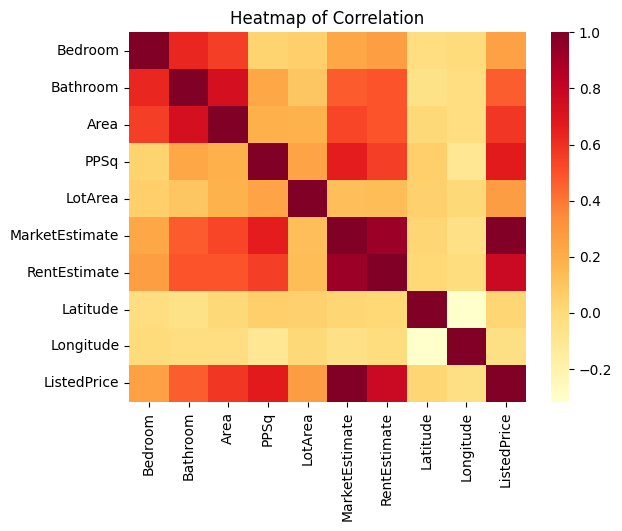

In [ ]:
sns.heatmap(
    data=df_dropped.corr(),
    cmap="YlOrRd",
    # annot=True,
    # fmt='.2f'
)
plt.title("Heatmap of Correlation");

As per the above correlation matrix and heatmap the `longitude` and `latitude` columns have a low correlation with the other columns.

Histogram of the numerical columns

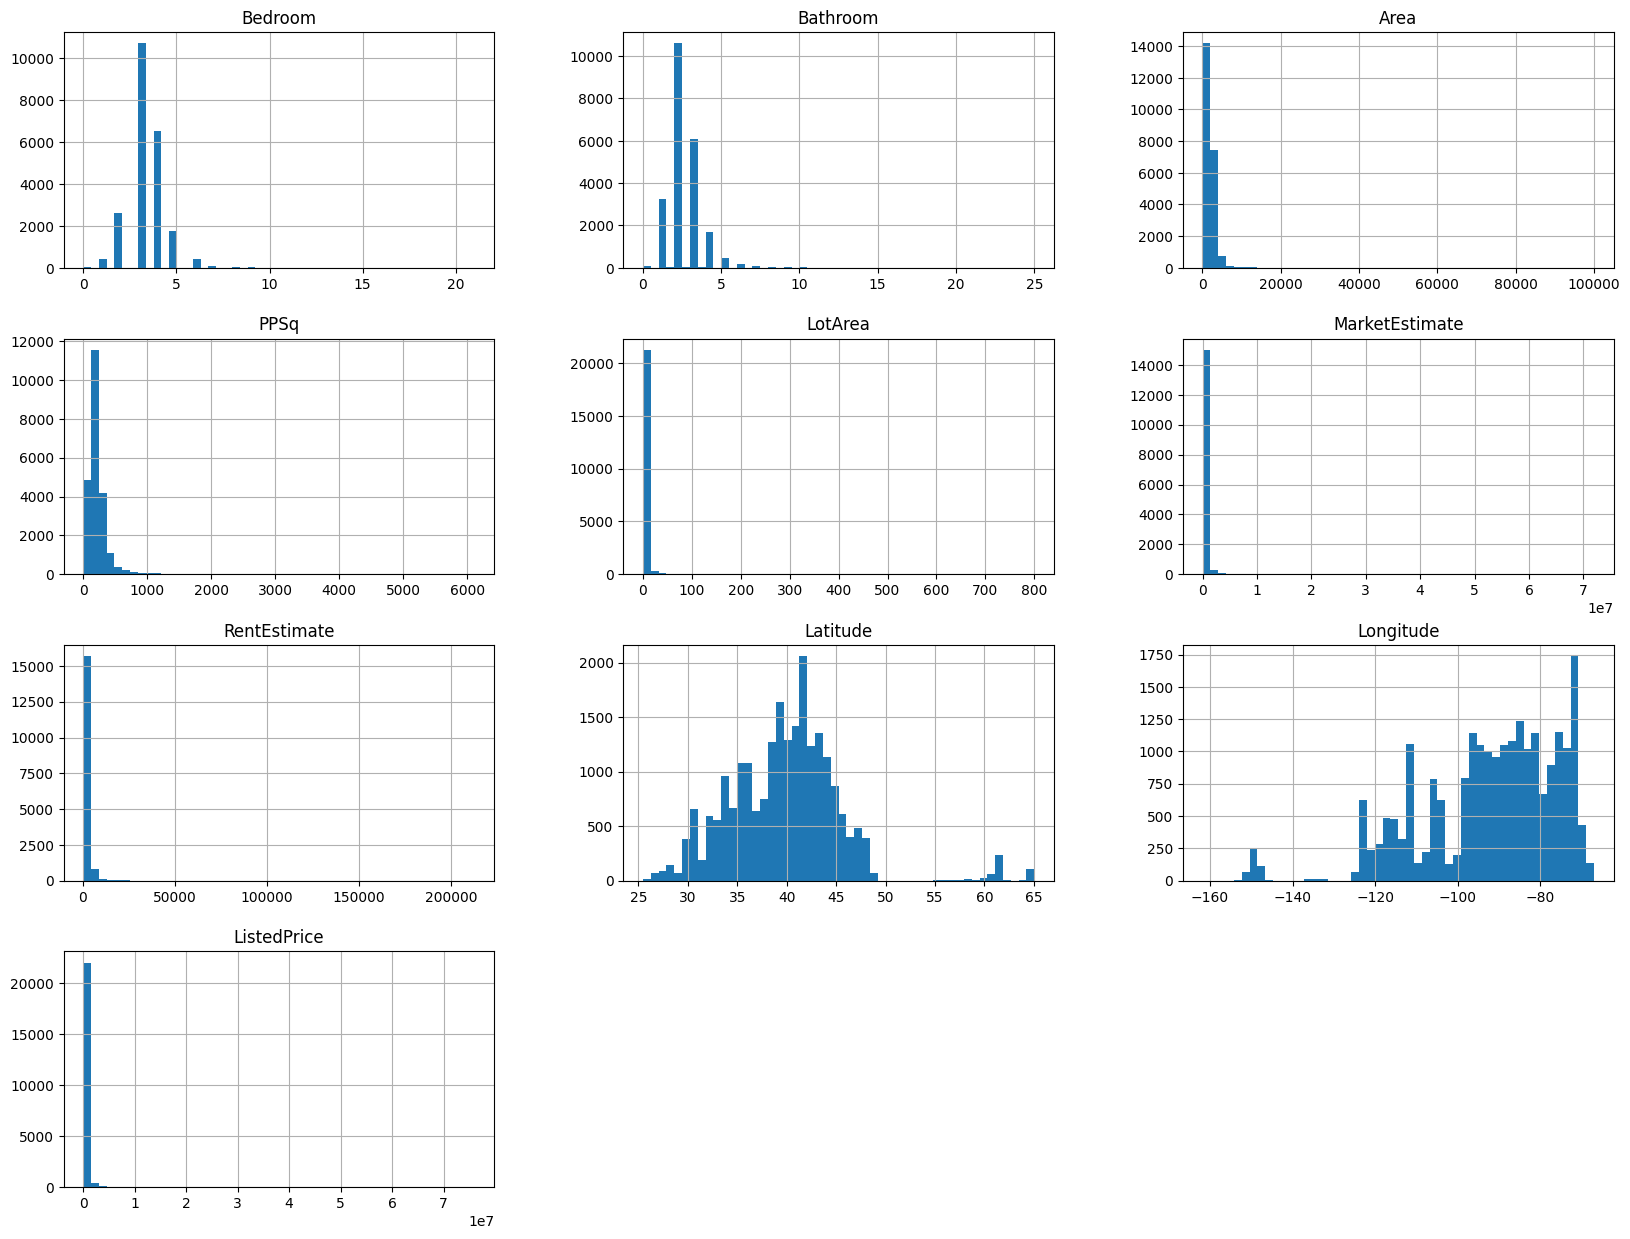

In [ ]:
df_dropped.hist(bins=50, figsize=(20,15))
plt.show()

The above histograms show that columns such as market estimate and rent estimate are not distributed well. We'll try to fix this by using a Standard Scaler when training our model.

## Machine Learning

### Insights

We are looking to predict the `Listed Price` of a house based on information such as `PPSq(Price Per Sqauare Foot)`. Based on the coreleation matrix, the longitdue and latitude have a low correlation to the `Listed Price`. Therefore, these columns, along with `Street` will not be used for model training. Due to the remaining columns having a good correlation with `Listed Price`, we will be using the columns `Bedroom`, `Bathroom`, `State`, `City`, `Zipcode`, `Area`, `PPSq`, `Rent Estimate`, `LotArea` and `Market Estimate` to train the model.

In [ ]:
ml_full_df = us_house_listings.copy().drop(columns=['Street', "Latitude", "Longitude"])
ml_full_df["ListedPrice"].fillna(ml_full_df["ListedPrice"].median(), inplace=True)

### Preparing the Data

Here we create the Machine Learning piple lines.

* The `num_pipe` is the Pipeline for numerical columns to be imputed and scaled
* We use the `OneHotEncoder` to encode categorical columns.

In [ ]:
num_attr = ml_full_df.drop(columns=['State', 'City', 'ListedPrice']).columns.tolist()
cat_attr = ['State', 'City', 'Zipcode']
# zip_code_attr =  ['Zipcode']

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("scale", StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipe, num_attr),
    ('cat', OrdinalEncoder(), cat_attr),
    # ('cat', OneHotEncoder(), cat_attr), # makes the traning time significantly longer due to it creating very large sparse arrays for categories like City and State
    # ('zip_cat', OrdinalEncoder(), zip_code_attr)
])

In [ ]:
full_pipeline.fit(ml_full_df.drop(columns='ListedPrice'))

# test datafram is 20% of the data, test dataframe will be split into train and validation sets
train_df, test_df = train_test_split(ml_full_df, test_size=0.20, random_state=42)

# train set
temp = train_df.drop(columns=["ListedPrice"])
X_tr = full_pipeline.transform(temp)
y_tr = train_df['ListedPrice']

# test set for assessing the model's performance
temp = test_df.drop(columns=["ListedPrice"])
X_te = full_pipeline.transform(temp)
y_te = test_df['ListedPrice']


In [ ]:
# models to train
models = [
    ("RF", RandomForestRegressor()),
    ("GB", GradientBoostingRegressor())
]

In [ ]:
# store trained models
trained_models = list()

for name, model in models:
  trained = model.fit(X_tr, y_tr)

  trained_models.append((name, trained))

  # print(name, np.sqrt(mean_squared_error(y_tr, model.predict(X_tr))))

  cvs = cross_val_score(model, X_tr, y_tr, scoring='neg_mean_squared_error', cv=5)
  scores = np.sqrt(-cvs)
  print(name + ":\n", "Mean score:", scores.mean(), "\n Standard deviation:", scores.std())

RF:
 Mean score: 549470.6211848749 
 Standard deviation: 232831.31687304628
GB:
 Mean score: 457817.58909974823 
 Standard deviation: 197247.20662107697


In [ ]:
models = [
    ("KNN", KNeighborsRegressor()),
    ("LR", LinearRegression())
]

In [ ]:
trained_models = list()

for name, model in models:
  trained = model.fit(X_tr, y_tr)

  trained_models.append((name, trained))

  cvs = cross_val_score(model, X_tr, y_tr, scoring='neg_mean_squared_error', cv=10)
  scores = np.sqrt(-cvs)
  print(name + ":\n", "Mean score:", scores.mean(), "\n Standard deviation:", scores.std())

KNN:
 Mean score: 1453324.9450985985 
 Standard deviation: 400897.2191244454
LR:
 Mean score: 868664.8023564111 
 Standard deviation: 256391.30864221335


* All the above models have perfomed poorly with a `RMSE` of at least `470,000`.

* This is most likely due to the extreme outliers that are present in the data.

### Outliers

We will proceed to remove the outliers in the data based on the `ListedPrice` column and train the models once again.

In [ ]:
ml_full_df.ListedPrice.describe()

count    2.268100e+04
mean     5.324399e+05
std      1.574922e+06
min      4.888000e+03
25%      2.250000e+05
50%      3.449000e+05
75%      4.999000e+05
max      7.600000e+07
Name: ListedPrice, dtype: float64

In [ ]:
q_95 = ml_full_df.ListedPrice.quantile(0.95)

ml_no_outliers_df = ml_full_df[ml_full_df.ListedPrice < q_95]

ml_no_outliers_df.head()

,State,City,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,ListedPrice
0,AL,Saraland,36571.0,4.0,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,239900.0
1,AL,Robertsdale,36567.0,3.0,2.0,1800.0,144.388889,3.2000,NaN,NaN,259900.0
2,AL,Gulf Shores,36542.0,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,342500.0
3,AL,Chelsea,35043.0,3.0,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,335000.0
4,AL,Huntsville,35811.0,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,250000.0


In [ ]:
ml_no_outliers_df.ListedPrice.describe()

count    2.152500e+04
mean     3.652147e+05
std      2.010815e+05
min      4.888000e+03
25%      2.200000e+05
50%      3.299000e+05
75%      4.700000e+05
max      1.099990e+06
Name: ListedPrice, dtype: float64

### Training with no outliers

In [ ]:
full_pipeline.fit(ml_no_outliers_df.drop(columns='ListedPrice'))

# test datafram is 20% of the data, temp dataframe will be split into train and validation sets
train_df, test_df = train_test_split(ml_no_outliers_df, test_size=0.20, random_state=42)

# train set
temp = train_df.drop(columns=["ListedPrice"])
X_tr = full_pipeline.transform(temp)
y_tr = train_df['ListedPrice']

# test set for assessing the model's performance
temp = test_df.drop(columns=["ListedPrice"])
X_te = full_pipeline.transform(temp)
y_te = test_df['ListedPrice']


In [ ]:
# models to train
models = [
    ("RF", RandomForestRegressor()),
    ("GB", GradientBoostingRegressor())
]

In [ ]:
# store trained models
ensemble_trained_models = list()

for name, model in models:
  trained = model.fit(X_tr, y_tr)

  ensemble_trained_models.append((name, trained))

  cvs = cross_val_score(model, X_tr, y_tr, scoring='neg_mean_squared_error', cv=5)
  scores = np.sqrt(-cvs)
  print(name + ":\n", "Mean score:", scores.mean(), "\n Standard deviation:", scores.std())


RF:
 Mean score: 17939.72410801377 
 Standard deviation: 2580.6510107036333
GB:
 Mean score: 20674.46703162858 
 Standard deviation: 1182.924995674744


In [ ]:
models_2 = [
    ("KNN", KNeighborsRegressor()),
    ("LR", LinearRegression())
]

In [ ]:
trained_models = list()

for name, model in models_2:
  trained = model.fit(X_tr, y_tr)

  trained_models.append((name, trained))

  cvs = cross_val_score(model, X_tr, y_tr, scoring='neg_mean_squared_error', cv=5)
  scores = np.sqrt(-cvs)
  print(name + ":\n", "Mean score:", scores.mean(), "\nStandard deviation:", scores.std())

KNN:
 Mean score: 164909.8866394136 
Standard deviation: 1197.3238224944396
LR:
 Mean score: 79585.99768461935 
Standard deviation: 7847.76515598555


###  GridSearch & RandomizedSearch

In [ ]:
# RandomForest and GradientBoosting
ensemble_searches = [
    ('RF Randomized Search', RandomizedSearchCV(
      estimator = RandomForestRegressor(),
      param_distributions = {
          'n_estimators': randint(low=50, high=200),
          'max_features': randint(low=1, high=7),
      },
      scoring='neg_mean_squared_error',
      n_iter = 10,
      cv=3
    )),
    ("GB Randomized Search", RandomizedSearchCV(
        estimator = GradientBoostingRegressor(),
        param_distributions = {
            'learning_rate' : [0.03, 0.05, 0.07, 0.1],
            'max_depth' : randint(low=2, high=5),
            'max_features': randint(low=1, high=7),
        },
        scoring='neg_mean_squared_error',
        n_iter = 10,
        cv=3
    ))
]

In [ ]:
searched_models = list()

for name, search in ensemble_searches:
  trained = search.fit(X_tr, y_tr)

  searched_models.append((name, trained))

  cvres = search.cv_results_

  print(name, ":")

  for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


RF Randomized Search :
38983.308822623825 {'max_features': 2, 'n_estimators': 116}
58728.89836242156 {'max_features': 1, 'n_estimators': 154}
19926.26425099651 {'max_features': 6, 'n_estimators': 76}
59093.882988478035 {'max_features': 1, 'n_estimators': 141}
19975.76498392999 {'max_features': 6, 'n_estimators': 136}
20449.676181007635 {'max_features': 6, 'n_estimators': 56}
30271.69061743371 {'max_features': 3, 'n_estimators': 72}
19849.122683541544 {'max_features': 6, 'n_estimators': 185}
58547.141063793206 {'max_features': 1, 'n_estimators': 143}
24972.94698732631 {'max_features': 4, 'n_estimators': 57}
GB Randomized Search :
73337.10393496434 {'learning_rate': 0.07, 'max_depth': 3, 'max_features': 1}
65431.78187905132 {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1}
20824.40531168913 {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 6}
75755.12804555501 {'learning_rate': 0.07, 'max_depth': 3, 'max_features': 1}
47562.10491518759 {'learning_rate': 0.05, 'max_depth': 3,

In [ ]:
# KNeighborsRegressor and LinearRegression
gridsearch_models = [
    ("KNN", GridSearchCV(
        estimator=KNeighborsRegressor(),
        param_grid={
            "n_neighbors" : [3, 5, 7, 9],
            'weights': ['distance', 'uniform']
        },
        scoring="neg_mean_squared_error",
        refit=True,
        n_jobs=3,
        cv=3
    )),
    ("LR", GridSearchCV(
        estimator=LinearRegression(),
        param_grid={
            "fit_intercept" : [True, False],
            'copy_X': [True, False],
            'positive': [True, False],
        },
        scoring="neg_mean_squared_error",
        refit=True,
        n_jobs=3,
        cv=3
    ))
]

In [ ]:
for name, search in gridsearch_models:
  trained = search.fit(X_tr, y_tr)

  searched_models.append((name, trained))

  cvres = search.cv_results_

  print(name, ":")

  for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

KNN :
167949.67558678295 {'n_neighbors': 3, 'weights': 'distance'}
168850.62985607225 {'n_neighbors': 3, 'weights': 'uniform'}
165437.30101029904 {'n_neighbors': 5, 'weights': 'distance'}
168930.41073425853 {'n_neighbors': 5, 'weights': 'uniform'}
164638.50838538757 {'n_neighbors': 7, 'weights': 'distance'}
170812.72460549092 {'n_neighbors': 7, 'weights': 'uniform'}
164295.5854846699 {'n_neighbors': 9, 'weights': 'distance'}
172734.05225458497 {'n_neighbors': 9, 'weights': 'uniform'}
LR :
80076.2434882055 {'copy_X': True, 'fit_intercept': True, 'positive': True}
79863.52640485286 {'copy_X': True, 'fit_intercept': True, 'positive': False}
137178.77113533719 {'copy_X': True, 'fit_intercept': False, 'positive': True}
115683.00301318882 {'copy_X': True, 'fit_intercept': False, 'positive': False}
80076.2434882055 {'copy_X': False, 'fit_intercept': True, 'positive': True}
79863.52640485286 {'copy_X': False, 'fit_intercept': True, 'positive': False}
137178.77113533719 {'copy_X': False, 'fit_i

### Testing

In [ ]:
search_results_df = pd.DataFrame()
model_names = list()
model_rmse = list()
model_best_params = list()

for name, model in searched_models:
  rmse = np.sqrt(mean_squared_error(y_te, model.predict(X_te)))

  print(name + ":\n", "RMSE:", rmse)
  print(" Best Parameters:", model.best_params_)

  model_names.append(name)
  model_rmse.append(rmse)
  model_best_params.append(model.best_params_)

search_results_df['Model'] = pd.Series(model_names)
search_results_df['RMSE'] = pd.Series(model_rmse)
search_results_df['Best params'] = pd.Series(model_best_params)

RF Randomized Search:
 RMSE: 16946.679523254425
 Best Parameters: {'max_features': 6, 'n_estimators': 185}
GB Randomized Search:
 RMSE: 20430.093241661747
 Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 6}
KNN:
 RMSE: 154480.1328541536
 Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}
LR:
 RMSE: 80124.20823459337
 Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [ ]:
search_results_df

,Model,RMSE,Best params
0,RF Randomized Search,16946.679523,"{'max_features': 6, 'n_estimators': 185}"
1,GB Randomized Search,20430.093242,"{'learning_rate': 0.1, 'max_depth': 4, 'max_fe..."
2,KNN,154480.132854,"{'n_neighbors': 9, 'weights': 'distance'}"
3,LR,80124.208235,"{'copy_X': True, 'fit_intercept': True, 'posit..."


It seems like the GridSearch and Randomized searches only yeilded worse models.

In [ ]:
vanilla_model_results_df = pd.DataFrame()
model_names = list()
model_rmse = list()

for name, model in trained_models:
  rmse = np.sqrt(mean_squared_error(y_te, model.predict(X_te)))
  print(name + ":\n", "RMSE:", rmse)

  model_names.append(name)
  model_rmse.append(rmse)

KNN:
 RMSE: 161049.3529877104
LR:
 RMSE: 80124.20823459337


In [ ]:
for name, model in ensemble_trained_models:
  rmse = np.sqrt(mean_squared_error(y_te, model.predict(X_te)))
  print(name + ":\n", "RMSE:", rmse)

  model_names.append(name)
  model_rmse.append(rmse)

vanilla_model_results_df['Model'] = pd.Series(model_names)
vanilla_model_results_df['RMSE'] = pd.Series(model_rmse)

RF:
 RMSE: 15836.4042045432
GB:
 RMSE: 20001.77203738322


In [ ]:
vanilla_model_results_df

,Model,RMSE
0,KNN,161049.352988
1,LR,80124.208235
2,RF,15836.404205
3,GB,20001.772037


Above we can notice that RandomForest with default parameterms is the best model with a `RMSE` of `15836.404205`

### Visualizing results

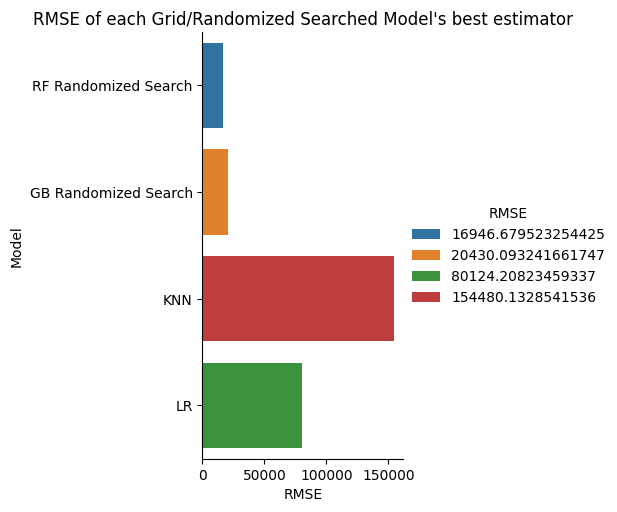

In [ ]:
sns.catplot(
    data=search_results_df,
    x='RMSE',
    y='Model',
    kind = 'bar',
    hue='RMSE',
    palette='tab10',
    legend=True
)
plt.title("RMSE of each Grid/Randomized Searched Model's best estimator");

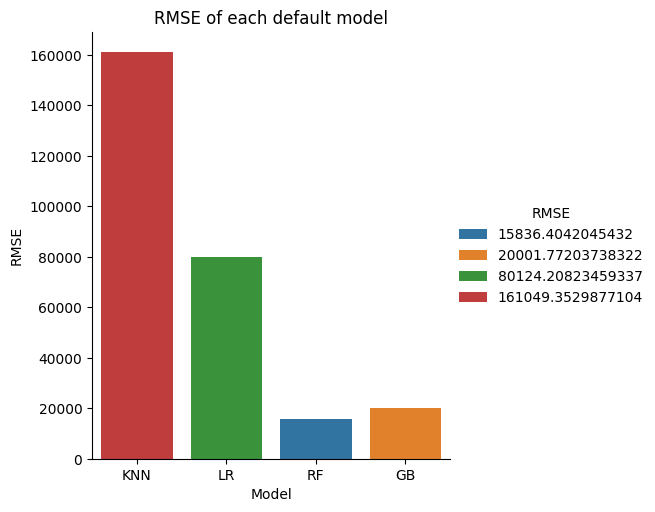

In [ ]:
sns.catplot(
    data=vanilla_model_results_df,
    x='Model',
    y='RMSE',
    kind='bar',
    hue='RMSE',
    palette='tab10',
    legend=True
)

plt.title("RMSE of each default model");

## Our Best Model: RandomForestClassifier

In [ ]:
best_model = ensemble_trained_models[0]

params = pd.DataFrame(pd.Series(best_model[1].get_params()))

print(best_model[0] + "\n", params)

RF
                                       0
bootstrap                          True
ccp_alpha                           0.0
criterion                 squared_error
max_depth                          None
max_features                        1.0
max_leaf_nodes                     None
max_samples                        None
min_impurity_decrease               0.0
min_samples_leaf                      1
min_samples_split                     2
min_weight_fraction_leaf            0.0
n_estimators                        100
n_jobs                             None
oob_score                         False
random_state                       None
verbose                               0
warm_start                        False


### RandomizedSearch of RF results

In [ ]:
rf_rand_search_cv_res_df = pd.DataFrame(searched_models[0][1].cv_results_)

rf_param_scores_df = rf_rand_search_cv_res_df[['params', 'mean_test_score']].copy()

mean_test_scores = np.array(rf_param_scores_df['mean_test_score'].tolist())

rf_param_scores_df['mean_test_score'] = pd.Series(np.sqrt(-mean_test_scores))

max_features = list()
n_estimators = list()

for val in rf_param_scores_df['params'].values:
  max_features.append(val['max_features'])
  n_estimators.append(val['n_estimators'])

rf_param_scores_df['max_features'] = pd.Series(max_features)
rf_param_scores_df['n_estimators'] = pd.Series(n_estimators)

rf_param_scores_df.drop(columns='params', inplace=True)

rf_param_scores_df

,mean_test_score,max_features,n_estimators
0,38983.308823,2,116
1,58728.898362,1,154
2,19926.264251,6,76
3,59093.882988,1,141
4,19975.764984,6,136
5,20449.676181,6,56
6,30271.690617,3,72
7,19849.122684,6,185
8,58547.141064,1,143
9,24972.946987,4,57


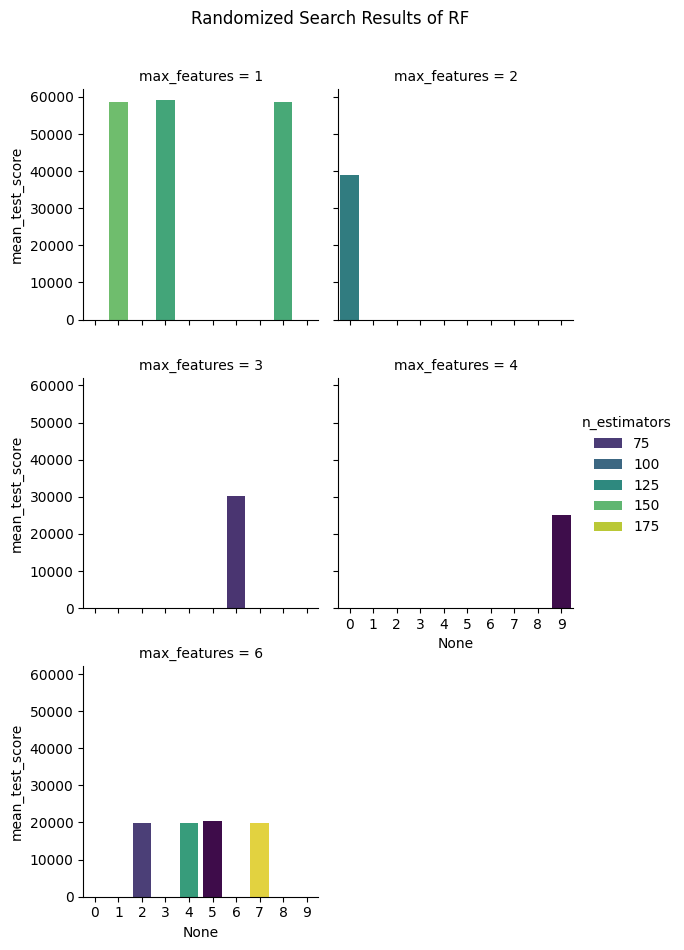

In [ ]:
sns.catplot(
    data=rf_param_scores_df,
    x=rf_param_scores_df.index,
    col='max_features',
    col_wrap=2,
    y='mean_test_score',
    hue='n_estimators',
    kind='bar',
    height=3,
    palette='viridis'
)
plt.suptitle("Randomized Search Results of RF", y=1.05);

### Best estimator

In [ ]:
best_est_df = vanilla_model_results_df[vanilla_model_results_df.Model == "RF"].copy()

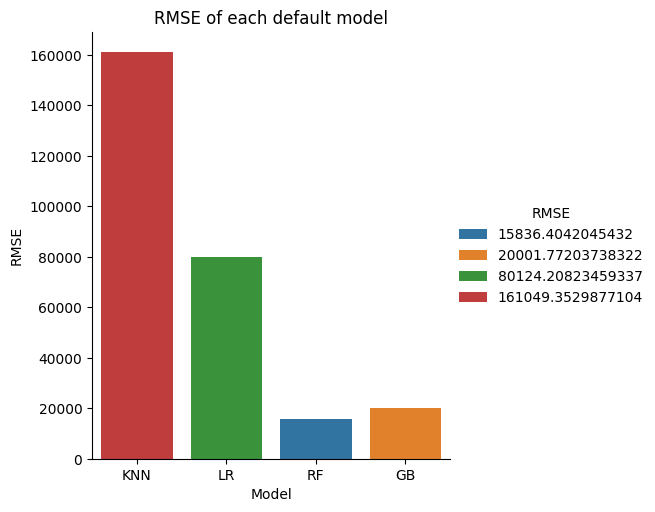

In [ ]:
sns.catplot(
    data=vanilla_model_results_df,
    x='Model',
    y='RMSE',
    kind='bar',
    hue='RMSE',
    palette='tab10',
    legend=True
)

plt.title("RMSE of each default model");

**The RandomForst in the above barplot is our best model.**

Note: The reason for the extreme RMSE in KNN is due to the use of an OrdinalEncoder for encoding categorical varaible. Because OrdianlEncoder encodes with single number rather than arrays with binary values (0 or 1), KNN is forced to think that values with similar encodings are related; however that is usually not the case.